In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')
altavish_boston_housing_dataset_path = kagglehub.dataset_download('altavish/boston-housing-dataset')
martininf1n1ty_filtered_eng_twitter_path = kagglehub.dataset_download('martininf1n1ty/filtered-eng-twitter')
martininf1n1ty_hotel_booking_demand_imputed_path = kagglehub.dataset_download('martininf1n1ty/hotel-booking-demand-imputed')

print('Data source import complete.')


Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


### Zadanie: Klasyfikacja znaków języka migowego

Twoim zadaniem jest stworzenie modelu sieci neuronowej do klasyfikacji znaków języka migowego na podstawie obrazów. Zbiór danych zawiera obrazy znaków reprezentujących litery alfabetu migowego, a Twoim celem jest nauczenie modelu rozpoznawania tych znaków.

Kroki, które musisz podjąć:

1. **Przygotowanie danych**: Dane treningowe zostały już wczytane z pliku CSV. Obrazy są w formacie 28x28 pikseli, a etykiety są przekształcone na one-hot encoding. Twoim zadaniem jest podział danych na zbiór uczący (training) i zbiór walidacyjny (validation). Pamiętaj, że wartości pikseli są przeskalowane do zakresu [0, 1].

2. **Model konwolucyjny**: Przygotuj model konwolucyjny. Jest to model konwolucyjny z warstwami konwolucyjnymi, warstwami max-pooling i warstwami Fully Connected (Dense). Model ma za zadanie klasyfikować znaki języka migowego na podstawie obrazów.

3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem, funkcją straty i metrykami. W tym przypadku, używamy optymalizatora 'adam' i funkcji straty 'categorical_crossentropy', ponieważ mamy problem kategorialnej klasyfikacji.

4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.

5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych (które są wciąż dostępne jako `X_test` i `y_test`). Sprawdź jakość klasyfikacji i innych metryk, aby ocenić skuteczność modelu w zadaniu klasyfikacji znaków języka migowego na podstawie obrazów.

Twoim celem jest stworzenie modelu, który będzie w stanie skutecznie klasyfikować znaki języka migowego na podstawie dostępnych obrazów. Możesz eksperymentować z architekturą modelu, parametrami trenowania i innymi aspektami, aby osiągnąć najlepsze rezultaty.

In [3]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv(f'{datamunge_sign_language_mnist_path}/sign_mnist_test.csv')
X = data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Wszystkie kolumny poza pierwszą to dane pikseli
y = data['label'].values   # Pierwsza kolumna to etykiety

In [5]:
X

array([[[149, 149, 150, ..., 150, 150, 149],
        [150, 150, 150, ..., 151, 150, 151],
        [150, 151, 151, ..., 151, 151, 152],
        ...,
        [ 69,  69,  77, ..., 116, 113, 118],
        [ 74,  75,  76, ..., 110, 116, 113],
        [ 75,  74,  74, ..., 112, 120, 107]],

       [[126, 128, 131, ..., 133, 134, 132],
        [129, 132, 134, ..., 136, 136, 134],
        [133, 135, 138, ..., 140, 139, 138],
        ...,
        [173, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 181],
        [172, 174, 177, ..., 184, 182, 180]],

       [[ 85,  88,  92, ..., 182, 181, 178],
        [ 86,  88,  93, ..., 183, 181, 179],
        [ 86,  89,  93, ..., 185, 183, 181],
        ...,
        [ 91,  94,  97, ..., 224, 222, 221],
        [ 90,  92,  96, ..., 225, 224, 222],
        [ 89,  91,  94, ..., 225, 224, 222]],

       ...,

       [[190, 191, 190, ..., 185, 184, 183],
        [193, 193, 193, ..., 186, 185, 184],
        [195, 194, 195, ..., 187, 186, 187

In [6]:
y

array([ 6,  5, 10, ...,  2,  4,  2])

In [7]:
y.shape

(7172,)

In [8]:
# Inicjalizacja i dopasowanie OneHotEncoder
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [9]:
X = X / 255.0

In [9]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

array([[[228, 231, 231, ..., 237, 237, 235],
        [230, 231, 233, ..., 238, 239, 238],
        [230, 231, 234, ..., 240, 240, 239],
        ...,
        [185, 179, 168, ..., 255, 255, 255],
        [157, 158, 160, ..., 255, 255, 255],
        [177, 156, 160, ..., 255, 255, 255]],

       [[132, 110, 120, ..., 141, 143, 147],
        [130, 114, 126, ..., 144, 147, 150],
        [129, 116, 128, ..., 147, 150, 152],
        ...,
        [144,  86, 168, ...,  71,  36,  35],
        [135,  94, 172, ...,  73,  32,  10],
        [126, 102, 171, ...,  72,  42,  23]],

       [[211, 211, 211, ..., 189, 186, 186],
        [212, 212, 212, ..., 191, 188, 187],
        [215, 214, 214, ..., 192, 189, 188],
        ...,
        [231, 231, 232, ..., 208, 206, 204],
        [232, 232, 232, ..., 208, 207, 205],
        [232, 232, 233, ..., 208, 206, 204]],

       ...,

       [[175, 178, 180, ..., 177, 176, 175],
        [177, 180, 181, ..., 179, 178, 178],
        [179, 181, 183, ..., 180, 179, 179

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# model.add(Conv2D(128, kernel_size = 4, activation='relu'))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(25, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [14]:
# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Model fit
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, shuffle=True, epochs=100, callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - accuracy: 0.3318 - loss: 3.0634 - val_accuracy: 0.1094 - val_loss: 141.9896
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8789 - loss: 0.3863 - val_accuracy: 0.2355 - val_loss: 33.6895
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9576 - loss: 0.1304 - val_accuracy: 0.7157 - val_loss: 1.9793
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9822 - loss: 0.0513 - val_accuracy: 0.8822 - val_loss: 0.6131
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9884 - loss: 0.0335 - val_accuracy: 0.9965 - val_loss: 0.0085
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9900 - loss: 0.0273 - val_accuracy: 0.9659 - val_loss: 0.1323
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9910 - loss: 0.0269 - val_accuracy: 0.9937 - val_loss: 0.0167
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9882 - loss: 0.0338 - val_accura

In [15]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0102
Loss: 0.008460627868771553, Accuracy: 0.996515691280365


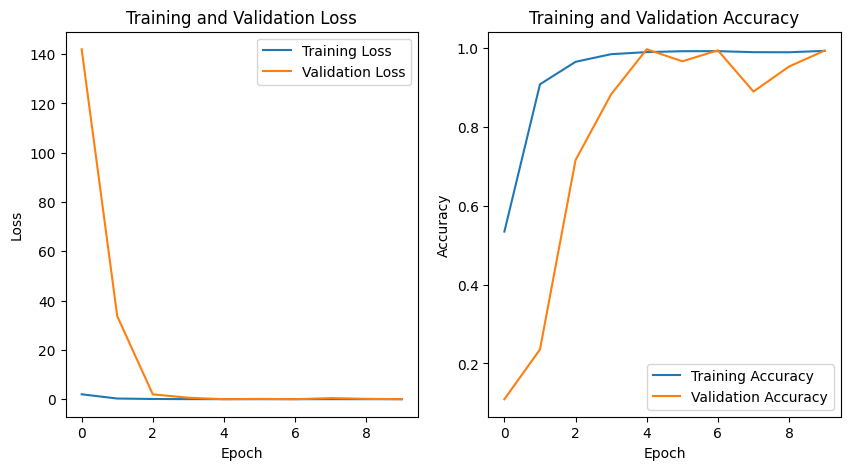

In [16]:
# prompt: wygeneruj wykres dla loss i accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


# Zadanie Pandas

Cechy (features) w zbiorze danych Boston Housing opisują różne parametry dotyczące nieruchomości w obszarze Bostonu. Oto krótki opis każdej z tych cech:

1. **CRIM**: Złoczyńczość na mieszkańca (Crime Rate per Capita) - Określa liczbę przestępstw na mieszkańca w danym obszarze. Jest to wskaźnik przestępczości w danym regionie.

2. **ZN**: Procent działek przeznaczonych pod zabudowę mieszkaniową (Proportion of Residential Land zoned for large lots) - Określa procent obszarów przeznaczonych pod duże działki przeznaczone pod zabudowę mieszkaniową.

3. **INDUS**: Procent obszarów przemysłowych (Proportion of Non-Retail Business Acres) - Określa procent obszarów przeznaczonych pod działalność gospodarczą, które nie są związane z handlem detalicznym.

4. **CHAS**: Bliskość do rzeki Charles (Charles River Dummy Variable) - Cecha binarna, która przyjmuje wartość 1, jeśli nieruchomość jest położona blisko rzeki Charles, a 0 w przeciwnym przypadku.

5. **NOX**: Stężenie tlenku azotu (Nitrogen Oxides Concentration) - Określa stężenie tlenku azotu w powietrzu, co jest miarą jakości powietrza w danym obszarze.

6. **RM**: Średnia liczba pokoi na mieszkanie (Average Number of Rooms per Dwelling) - Określa średnią liczbę pokoi w mieszkaniu lub domu.

7. **AGE**: Procent budynków zbudowanych przed 1940 rokiem (Proportion of Owner-Occupied Units Built Prior to 1940) - Określa procent budynków, które zostały zbudowane przed 1940 rokiem.

8. **DIS**: Wagi ważone odległości do pięciu centrów zatrudnienia w Bostonie (Weighted Distances to Employment Centers) - Opisuje odległość od nieruchomości do pięciu centrów zatrudnienia w Bostonie.

9. **RAD**: Prostota dostępu do głównych dróg radialnych (Accessibility to Radial Highways) - Określa prostotę dostępu do głównych dróg radialnych.

10. **TAX**: Stawka podatku od nieruchomości (Property Tax Rate) - Określa stawkę podatku od nieruchomości w danym regionie.

11. **PTRATIO**: Stosunek liczby uczniów do nauczycieli (Pupil-Teacher Ratio) - Opisuje stosunek liczby uczniów do nauczycieli w miejscowej szkole podstawowej.

12. **B**: Procent mieszkańców pochodzenia afroamerykańskiego (Proportion of Residents of African American Descent) - Określa procent mieszkańców w danej dzielnicy pochodzenia afroamerykańskiego.

13. **LSTAT**: Procent ludności o niższym statusie społecznym (Lower Status Population Percentage) - Określa procent ludności o niższym statusie społecznym w danej dzielnicy.

14. **MEDV**: Mediana cen mieszkań (Median Value of Owner-Occupied Homes) - Jest to zmienna celu w zadaniu regresji, która określa medianę cen mieszkań w danej okolicy. Jest to zazwyczaj ta wartość, którą model ma na celu przewidzieć.

Te cechy są używane w zbiorze danych Boston Housing do przewidywania cen nieruchomości w Bostonie.

### Zadania pandas danych Boston Housing:

   - 1. Wybierz nieruchomości, których wiek (AGE) przekracza 95 lat.
   - 2. Wybierz nieruchomości, które znajdują się blisko rzeki Charles (CHAS = 1).
   - 3. Wybierz nieruchomości, których cena (MEDV) wynosi mniej niż 20 000 dolarów.
   - 4. Pogrupuj nieruchomości na podstawie liczby pokoi na mieszkanie (RM) i oblicz średnią cenę (MEDV) dla każdej grupy.
   - 5. Pogrupuj nieruchomości na podstawie ilości pokoi na mieszkanie (RM) i wieku (AGE), a następnie oblicz średnią stawkę podatku od nieruchomości (TAX) dla każdej kombinacji.
   - 6. Oblicz maksymalną i minimalną cenę nieruchomości (MEDV) w zbiorze danych.
   - 7. Oblicz średnią stawkę podatku od nieruchomości (TAX) w całym zbiorze danych.
   - 8. Wybierz nieruchomości, które mają wiek (AGE) poniżej 30 lat i jednocześnie znajdują się blisko rzeki Charles (CHAS = 1).


In [ ]:
import pandas as pd

df = pd.read_csv(f'{altavish_boston_housing_dataset_path}/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df_95 = df[df['AGE'] > 95]
df_95

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1


In [ ]:
df_charles = df[df['CHAS'] == 1]
df_charles

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.17446,NaN,10.59,1.0,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
211,0.37578,0.0,10.59,1.0,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3


In [ ]:
df_20_000 = df[df['MEDV'] < 20_000]
df_20_000

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df_avg_price = df.groupby('RM')['MEDV'].mean()
df_avg_price

,MEDV
RM,
3.561,27.50
3.863,23.10
4.138,12.85
4.368,8.80
4.519,7.00
...,...
8.375,50.00
8.398,48.80
8.704,50.00


In [ ]:
df_room_count = df.groupby(['RM', 'AGE'])['TAX'].mean()
df_room_count

,,TAX
RM,AGE,
3.561,87.9,666.0
3.863,100.0,666.0
4.138,100.0,666.0
4.368,91.2,666.0
4.519,100.0,666.0
...,...,...
8.337,73.3,307.0
8.398,91.5,264.0
8.704,86.9,264.0


In [ ]:
df_min_price = df['MEDV'].min()
df_max_price = df['MEDV'].max()
print(f'minimalna cena: {df_min_price} USD, maksymalna cena: {df_max_price} USD')

minimalna cena: 5.0 USD, maksymalna cena: 50.0 USD


In [ ]:
df_tax = df['TAX'].mean()
df_tax

408.2371541501976

In [ ]:
df_age30 = df[(df['AGE'] < 30) & (df['CHAS'] == 1)]
df_age30

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
277,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN,33.1
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0




### Zadanie: Model regresji cen nieruchomości

Twoim zadaniem jest stworzenie modelu regresji, który będzie przewidywał ceny nieruchomości na podstawie zestawu danych dotyczących nieruchomości. W zbiorze danych znajdują się różne cechy nieruchomości, takie jak liczba pokoi, powierzchnia, lokalizacja itp., oraz odpowiadające im ceny.

Kroki, które musisz podjąć:

1. **Przygotowanie danych**: Dane zostały już wczytane z pliku CSV. Zbiór danych zawiera cechy nieruchomości oraz odpowiadające im ceny. Wartości cen zostały już przekształcone na zmienną `y`, a cechy na zmienną `X`. Twoim zadaniem jest podzielenie danych na zbiór uczący (training) i zbiór testowy (test). Ponadto, dane powinny być znormalizowane, co zostało już zaimplementowane w kodzie.

2. **Model regresyjny**: Zdefiniuj swój model sieci neurnonowej. Jest to model regresyjny, który składa się z warstw Dense. Model ma za zadanie przewidywać ceny nieruchomości na podstawie cech.

3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem (w tym przypadku 'adam') i funkcją straty (mean squared error, 'mean_squared_error').

4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.

5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych. Sprawdź jak dobrze model przewiduje ceny nieruchomości i oblicz średni błąd kwadratowy (Mean Squared Error).

6. **Predykcja na nowych danych**: Przetestuj model, przewidując cenę nieruchomości na podstawie danych treningowych.

Twoim celem jest stworzenie modelu, który będzie w stanie dokładnie przewidywać ceny nieruchomości na podstawie dostępnych cech. Możesz eksperymentować z architekturą modelu, parametrami trenowania i innymi aspektami, aby osiągnąć najlepsze rezultaty.



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(f'{altavish_boston_housing_dataset_path}/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [18]:
data = pd.read_csv(f'{altavish_boston_housing_dataset_path}/HousingData.csv')
data =  data.dropna()
X = data.iloc[:, :-1].values  # Wszystkie kolumny poza pierwszą to dane pikseli
y = data.iloc[:,-1].values   # Pierwsza kolumna to etykiety

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #  uwaga na input_shape
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  #  regresja
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
input_shape=(X_train.shape[1],)
input_shape

(13,)

In [22]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [25]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - loss: 455.8697 - mean_absolute_error: 19.3288 - val_loss: 125.0515 - val_mean_absolute_error: 8.8804
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 101.3328 - mean_absolute_error: 7.8613 - val_loss: 30.3939 - val_mean_absolute_error: 3.9347
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 33.5409 - mean_absolute_error: 4.2095 - val_loss: 23.3702 - val_mean_absolute_error: 3.6047
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.2708 - mean_absolute_error: 3.6305 - val_loss: 14.8032 - val_mean_absolute_error: 2.9362
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5480 - mean_absolute_error: 2.5534 - val_loss: 11.5843 - val_mean_absolute_error: 2.6968
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3095 - mean_absolute_error: 2.3892 - val_loss: 13.4277 - val_mean_absolute_error: 2.7541
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.5563 - mean_absolute_er

In [26]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'\n Test Loss (MSE): {test_loss:.4f}')
print(f' Test MAE: {test_mae:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.8392 - mean_absolute_error: 2.9427 

 Test Loss (MSE): 25.2776
 Test MAE: 2.8361


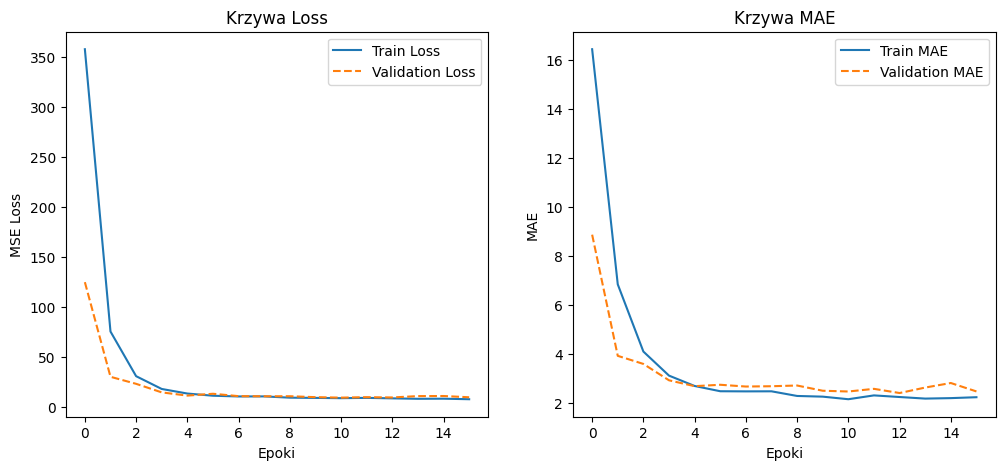

In [27]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Krzywa Loss')

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()
plt.title('Krzywa MAE')

plt.show()

In [28]:
sample_data = np.array([X_test[0]])  # pierwszy przyklad ze zbioru testowego
predicted_price = model.predict(sample_data)[0][0]
actual_price = y_test[0]

print(f'\n Rzeczywista cena: {actual_price:.2f}')
print(f' Przewidywana cena: {predicted_price:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step

 Rzeczywista cena: 25.00
 Przewidywana cena: 24.76


### Zadanie

Twoim zadaniem jest stworzenie modelu klasyfikacji, który przewidzy pobyt (0 - krótki, 1- długi) podstawie zestawu danych dotyczących klientów. W zbiorze danych znajdują się różne cechy kientów.

1. Pierwszym krokiem jest przygotowanie danych do procesu trenowania. Wczytaj dane z pliku CSV i podzielone na cechy (X) oraz zmienne docelowe (y) df['long_stay'], należy teraz podzielić te dane na zbiory treningowe i testowe. Ponadto, bardzo ważne jest znormalizowanie danych, aby uniknąć problemów ze skalowaniem cech i przyspieszyć proces uczenia. Danę są już opowiednio ukategoryzowane z użyciem one_hot_encodera.



In [5]:
import pandas as pd

df = pd.read_csv(f'{martininf1n1ty_hotel_booking_demand_imputed_path}/preprocessed_data_long_stays.csv')
df

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,total_guests,...,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,long_stay
0,342.0,2.0,0.0,0.0,0.0,0.0,3.0,0.00,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,737.0,2.0,0.0,0.0,0.0,0.0,4.0,0.00,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,75.00,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,13.0,1.0,0.0,0.0,0.0,0.0,0.0,75.00,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,14.0,2.0,0.0,0.0,0.0,0.0,0.0,98.00,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,23.0,2.0,0.0,0.0,0.0,0.0,0.0,96.14,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
87392,102.0,3.0,0.0,0.0,0.0,0.0,0.0,225.43,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
87393,34.0,2.0,0.0,0.0,0.0,0.0,0.0,157.71,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
87394,109.0,2.0,0.0,0.0,0.0,0.0,0.0,104.40,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [7]:
df.columns

Index(['lead_time', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'total_of_special_requests', 'total_guests',
       ...
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'long_stay'],
      dtype='object', length=210)

In [8]:
y = df['long_stay']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytanie danych


# Podział danych na cechy (X) i etykiety (y)
X = df.drop('long_stay', axis=1)  # Wszystkie kolumny poza 'long_stay' to cechy
y = df['long_stay']  # Kolumna 'long_stay' to etykiety

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. **Model clasyfikujący**: Zdefiniuj swój model sieci neurnonowej. Jest to model klasyfikujący, który składa się z warstw Dense.
​
3. **Kompilacja modelu**: Model musi zostać skompilowany z odpowiednim optymalizatorem (w tym przypadku 'adam') i funkcją straty (binary_crossentropy).
​
4. **Trenowanie modelu**: Trenuj model na danych treningowych z użyciem zbioru walidacyjnego. Możesz dostosować liczbę epok, rozmiar wsadu (batch size) i inne parametry trenowania, aby uzyskać jak najlepsze wyniki.
​
5. **Ewaluacja modelu**: Po zakończeniu trenowania, ocen model na danych testowych. Sprawdź jak dobrze model przewiduje ceny nieruchomości i accuray.
​
6. **Predykcja na nowych danych**: Przetestuj model, przewidując **long_stay** na podstawie danych treningowych.
​


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)


# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       0.86      0.98      0.91     15001
     Anomaly       0.13      0.02      0.03      2479

    accuracy                           0.84     17480
   macro avg       0.50      0.50      0.47     17480
weighted avg       0.76      0.84      0.79     17480



In [11]:
X_test.shape[0]

17480

In [12]:
y.shape[0]

87396

In [16]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [25]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping],
                    shuffle=True)

Epoch 1/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8444 - loss: 0.4677 - val_accuracy: 0.8524 - val_loss: 0.3707
Epoch 2/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8615 - loss: 0.3534 - val_accuracy: 0.8695 - val_loss: 0.3377
Epoch 3/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8665 - loss: 0.3425 - val_accuracy: 0.8703 - val_loss: 0.3355
Epoch 4/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8724 - loss: 0.3287 - val_accuracy: 0.8704 - val_loss: 0.3418
Epoch 5/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8738 - loss: 0.3238 - val_accuracy: 0.8731 - val_loss: 0.3282
Epoch 6/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8732 - loss: 0.3282 - val_accuracy: 0.8677 - val_loss: 0.3331
Epoch 7/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8772 - loss: 0.3230 - val_accuracy: 0.8718 - val_loss: 0.3386
Epoch 8/100
3496/3496 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8779 -

In [26]:
model.evaluate(X_test, y_test, verbose=1)

547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8827 - loss: 0.3005


[0.3017288148403168, 0.8817505836486816]

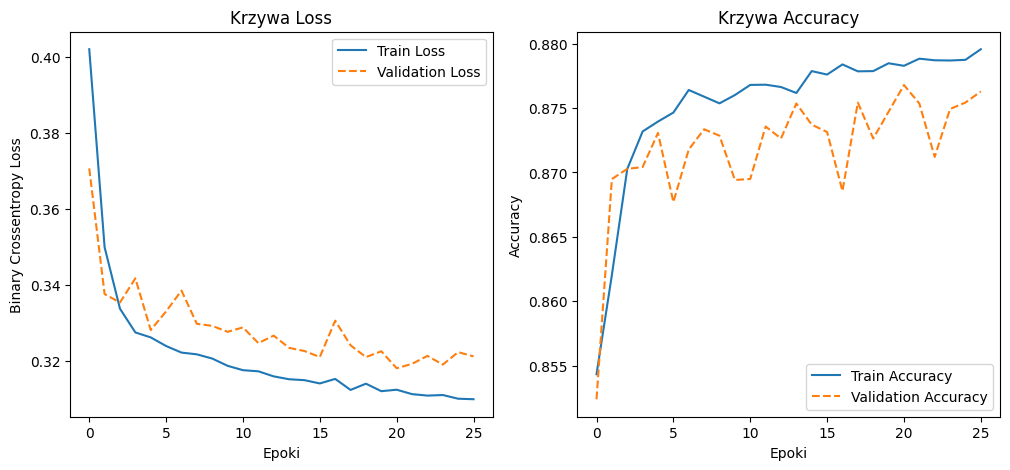

In [27]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.title('Krzywa Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Krzywa Accuracy')

plt.show()

In [28]:
for i in range(10):
    sample_data = np.array([X_test.iloc[i].values])  # Access row i using iloc
    predicted_price = model.predict(sample_data)[0][0]
    actual_price = y_test.iloc[i]  # Access element i using iloc
    print(f"Sample {i+1}:")
    print(f"  Actual Price: {actual_price:.2f}")
    print(f"  Predicted Price: {predicted_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Sample 1:
  Actual Price: 0.00
  Predicted Price: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 2:
  Actual Price: 0.00
  Predicted Price: 0.04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Sample 3:
  Actual Price: 0.00
  Predicted Price: 0.14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Sample 4:
  Actual Price: 1.00
  Predicted Price: 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Sample 5:
  Actual Price: 0.00
  Predicted Price: 0.10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Sample 6:
  Actual Price: 0.00
  Predicted Price: 0.12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Sample 7:
  Actual Price: 0.00
  Predicted Price: 0.14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 8:
  Actual Price: 0.00
  Predicted Price: 0.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 9:
  Actual Price: 0.00
  Predicted Price: 0.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 10:
  Actual Price: 0.00
  Predicted Price: 0.17


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


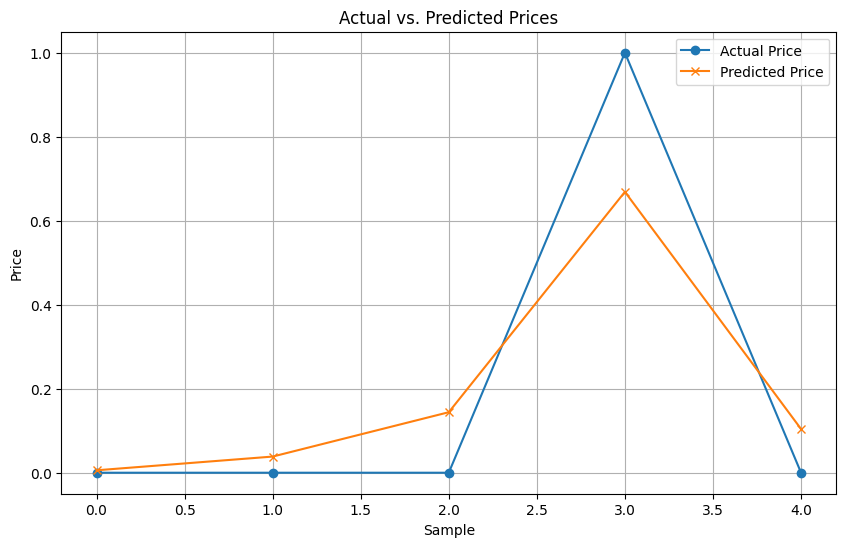

In [29]:
import matplotlib.pyplot as plt

actual_prices = []
predicted_prices = []
for i in range(5):
    sample_data = np.array([X_test.iloc[i].values])
    predicted_price = model.predict(sample_data)[0][0]
    actual_price = y_test.iloc[i]
    actual_prices.append(actual_price)
    predicted_prices.append(predicted_price)


plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price', marker='o')
plt.plot(predicted_prices, label='Predicted Price', marker='x')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()
